# 数据获取

In [1]:
import pandas as pd

# 创建一个空的DataFrame来存储所有年份的数据
all_names = pd.DataFrame()

# 遍历每一年
for year in range(1880, 2011):
    # 读取该年份的数据
    path = f'datasets/babynames/yob{year}.txt'
    names = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    # 添加一个表示年份的列
    names['year'] = year
    
    # 将该年份的数据添加到all_names中
    all_names = pd.concat([all_names, names], ignore_index=True)

# 根据年份和性别对数据进行分组，然后计算每一组的出生总数
total_births = all_names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# 添加一个表示总体出生数的列
total_births['total'] = total_births['F'] + total_births['M']

total_births

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2006,1896468,2050234,3946702
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955


# 随机森林模型 Random Forest Model

In [2]:
from sklearn.ensemble import RandomForestRegressor

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 进行预测
rfpredictions = model.predict(X_test)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), rfpredictions):
    print(f"{year}年, 预测比例: {prediction}")

1981年, 预测比例: 1.073471093474844
1982年, 预测比例: 1.073471093474844
1983年, 预测比例: 1.073471093474844
1984年, 预测比例: 1.073471093474844
1985年, 预测比例: 1.073471093474844
1986年, 预测比例: 1.073471093474844
1987年, 预测比例: 1.073471093474844
1988年, 预测比例: 1.073471093474844
1989年, 预测比例: 1.073471093474844
1990年, 预测比例: 1.073471093474844
1991年, 预测比例: 1.073471093474844
1992年, 预测比例: 1.073471093474844
1993年, 预测比例: 1.073471093474844
1994年, 预测比例: 1.073471093474844
1995年, 预测比例: 1.073471093474844
1996年, 预测比例: 1.073471093474844
1997年, 预测比例: 1.073471093474844
1998年, 预测比例: 1.073471093474844
1999年, 预测比例: 1.073471093474844
2000年, 预测比例: 1.073471093474844
2001年, 预测比例: 1.073471093474844
2002年, 预测比例: 1.073471093474844
2003年, 预测比例: 1.073471093474844
2004年, 预测比例: 1.073471093474844
2005年, 预测比例: 1.073471093474844
2006年, 预测比例: 1.073471093474844
2007年, 预测比例: 1.073471093474844
2008年, 预测比例: 1.073471093474844
2009年, 预测比例: 1.073471093474844
2010年, 预测比例: 1.073471093474844


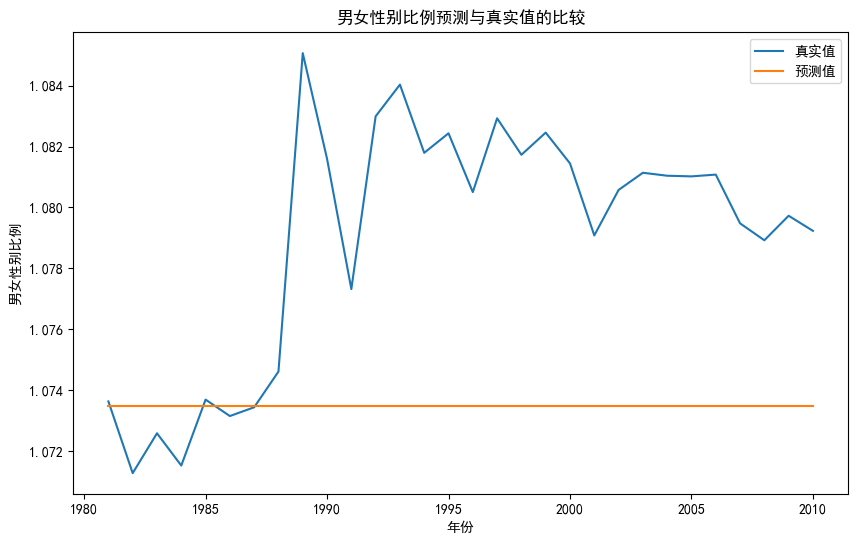

In [3]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, rfpredictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 4.6029361175577194e-05
根均方误差（RMSE）: 0.00678449417241825


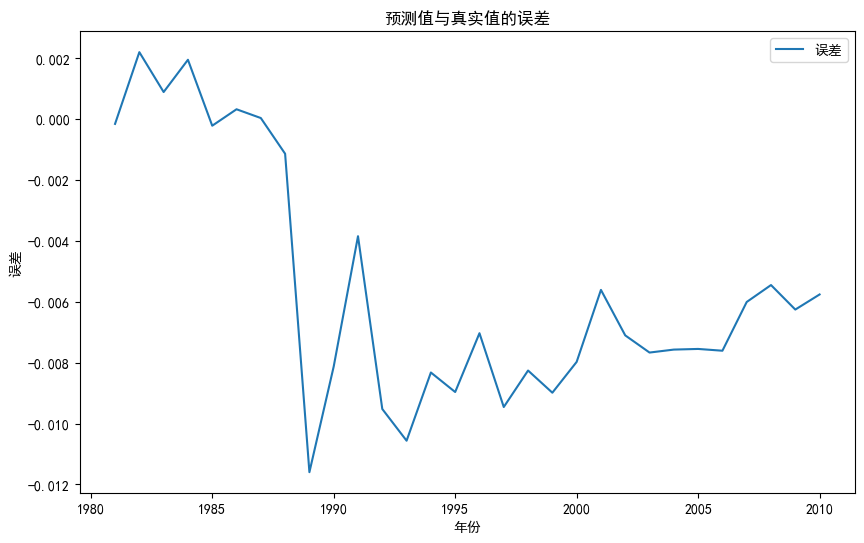

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, rfpredictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = rfpredictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()

# 线性回归模型 LR Model

In [5]:
from sklearn.linear_model import LinearRegression

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
lr1predictions = model.predict(X_test)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), lr1predictions):
    print(f"{year}年, 预测比例: {prediction}")

1981年, 预测比例: 1.1566984276218957
1982年, 预测比例: 1.1621861473069082
1983年, 预测比例: 1.1676738669919224
1984年, 预测比例: 1.1731615866769367
1985年, 预测比例: 1.1786493063619492
1986年, 预测比例: 1.1841370260469635
1987年, 预测比例: 1.1896247457319777
1988年, 预测比例: 1.1951124654169902
1989年, 预测比例: 1.2006001851020045
1990年, 预测比例: 1.2060879047870188
1991年, 预测比例: 1.2115756244720313
1992年, 预测比例: 1.2170633441570455
1993年, 预测比例: 1.2225510638420598
1994年, 预测比例: 1.2280387835270723
1995年, 预测比例: 1.2335265032120866
1996年, 预测比例: 1.2390142228971008
1997年, 预测比例: 1.2445019425821133
1998年, 预测比例: 1.2499896622671276
1999年, 预测比例: 1.2554773819521419
2000年, 预测比例: 1.2609651016371544
2001年, 预测比例: 1.2664528213221686
2002年, 预测比例: 1.271940541007183
2003年, 预测比例: 1.2774282606921972
2004年, 预测比例: 1.2829159803772097
2005年, 预测比例: 1.288403700062224
2006年, 预测比例: 1.2938914197472382
2007年, 预测比例: 1.2993791394322507
2008年, 预测比例: 1.304866859117265
2009年, 预测比例: 1.3103545788022792
2010年, 预测比例: 1.3158422984872917


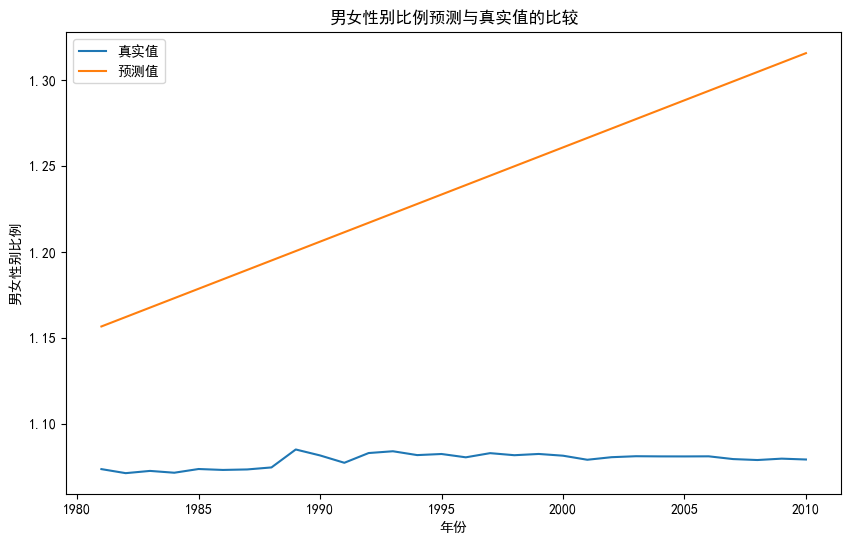

In [6]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, lr1predictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 0.02679069259748423
根均方误差（RMSE）: 0.1636786259640648


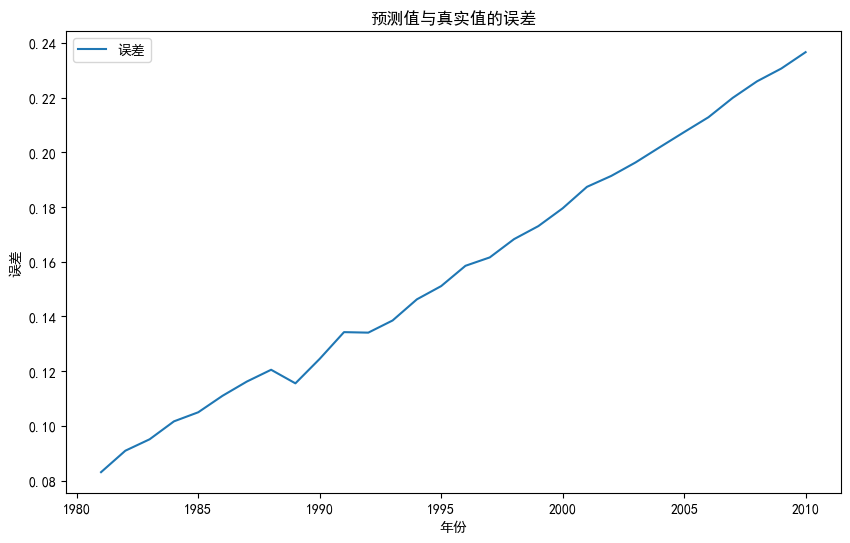

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 计算均方误差
mse = mean_squared_error(y_test, lr1predictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = lr1predictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()

# 多项式回归模型 LR Model

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# 进行预测
lr2predictions = model.predict(X_test_poly)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), lr2predictions):
    print(f"{year}年, 预测比例: {prediction}")

1981年, 预测比例: 1.1808455397682565
1982年, 预测比例: 1.1877536778148539
1983年, 预测比例: 1.1946893968005128
1984年, 预测比例: 1.2016526967252332
1985年, 预测比例: 1.208643577589008
1986年, 预测比例: 1.2156620393918303
1987年, 预测比例: 1.2227080821337353
1988年, 预测比例: 1.2297817058146876
1989年, 预测比例: 1.2368829104347085
1990年, 预测比例: 1.244011695993791
1991年, 预测比例: 1.2511680624919137
1992年, 预测比例: 1.2583520099291121
1993年, 预测比例: 1.265563538305372
1994年, 预测比例: 1.2728026476206935
1995年, 预测比例: 1.2800693378750694
1996年, 预测比例: 1.2873636090684997
1997年, 预测比例: 1.2946854612009986
1998年, 预测比例: 1.302034894272559
1999年, 预测比例: 1.309411908283181
2000年, 预测比例: 1.3168165032328574
2001年, 预测比例: 1.324248679121581
2002年, 预测比例: 1.3317084359493876
2003年, 预测比例: 1.3391957737162485
2004年, 预测比例: 1.346710692422164
2005年, 预测比例: 1.354253192067148
2006年, 预测比例: 1.361823272651172
2007年, 预测比例: 1.369420934174272
2008年, 预测比例: 1.3770461766364335
2009年, 预测比例: 1.3846990000376564
2010年, 预测比例: 1.392379404377941


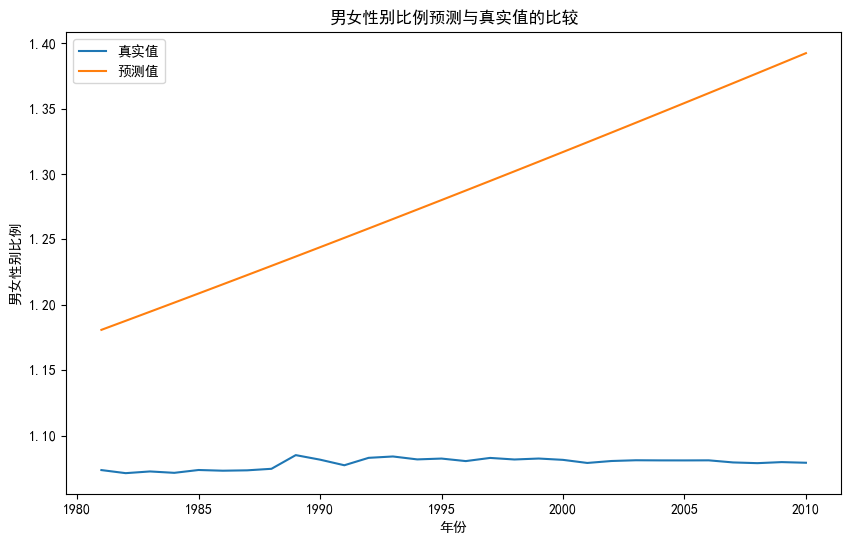

In [9]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, lr2predictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 0.04605248335813407
根均方误差（RMSE）: 0.21459842347541622


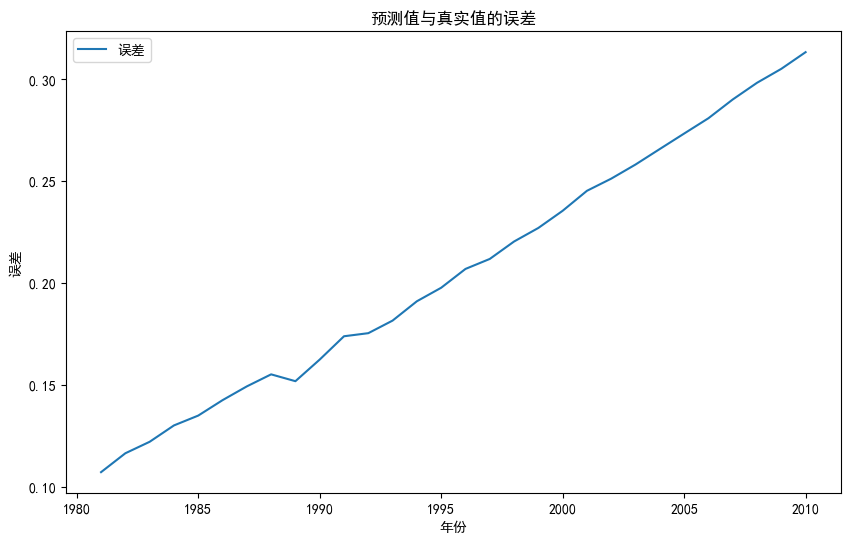

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, lr2predictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = lr2predictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()

# XGBoost回归

In [11]:
from xgboost import XGBRegressor

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
model = XGBRegressor()
model.fit(X_train, y_train)

# 进行预测
xgbpredictions = model.predict(X_test)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), xgbpredictions):
    print(f"{year}年, 预测比例: {prediction}")

1981年, 预测比例: 1.0729964971542358
1982年, 预测比例: 1.0729964971542358
1983年, 预测比例: 1.0729964971542358
1984年, 预测比例: 1.0729964971542358
1985年, 预测比例: 1.0729964971542358
1986年, 预测比例: 1.0729964971542358
1987年, 预测比例: 1.0729964971542358
1988年, 预测比例: 1.0729964971542358
1989年, 预测比例: 1.0729964971542358
1990年, 预测比例: 1.0729964971542358
1991年, 预测比例: 1.0729964971542358
1992年, 预测比例: 1.0729964971542358
1993年, 预测比例: 1.0729964971542358
1994年, 预测比例: 1.0729964971542358
1995年, 预测比例: 1.0729964971542358
1996年, 预测比例: 1.0729964971542358
1997年, 预测比例: 1.0729964971542358
1998年, 预测比例: 1.0729964971542358
1999年, 预测比例: 1.0729964971542358
2000年, 预测比例: 1.0729964971542358
2001年, 预测比例: 1.0729964971542358
2002年, 预测比例: 1.0729964971542358
2003年, 预测比例: 1.0729964971542358
2004年, 预测比例: 1.0729964971542358
2005年, 预测比例: 1.0729964971542358
2006年, 预测比例: 1.0729964971542358
2007年, 预测比例: 1.0729964971542358
2008年, 预测比例: 1.0729964971542358
2009年, 预测比例: 1.0729964971542358
2010年, 预测比例: 1.0729964971542358


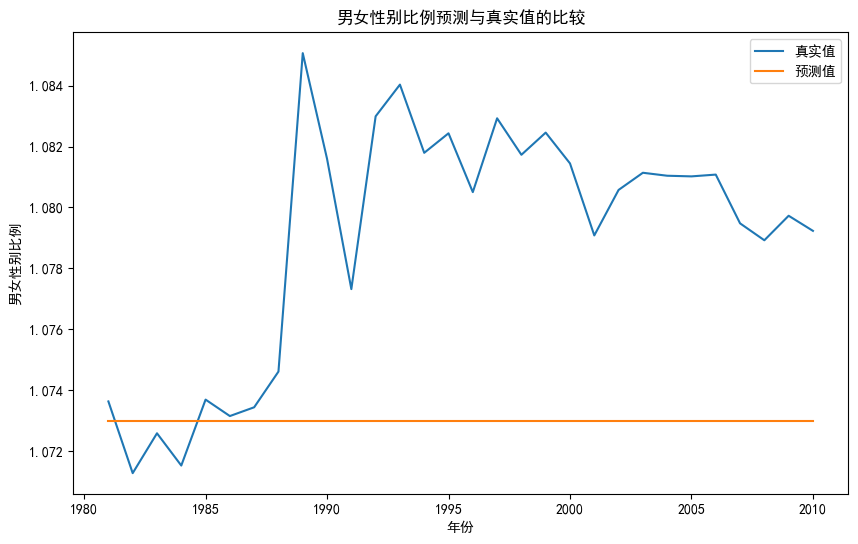

In [12]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, xgbpredictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 5.148856595830649e-05
根均方误差（RMSE）: 0.007175553355547326


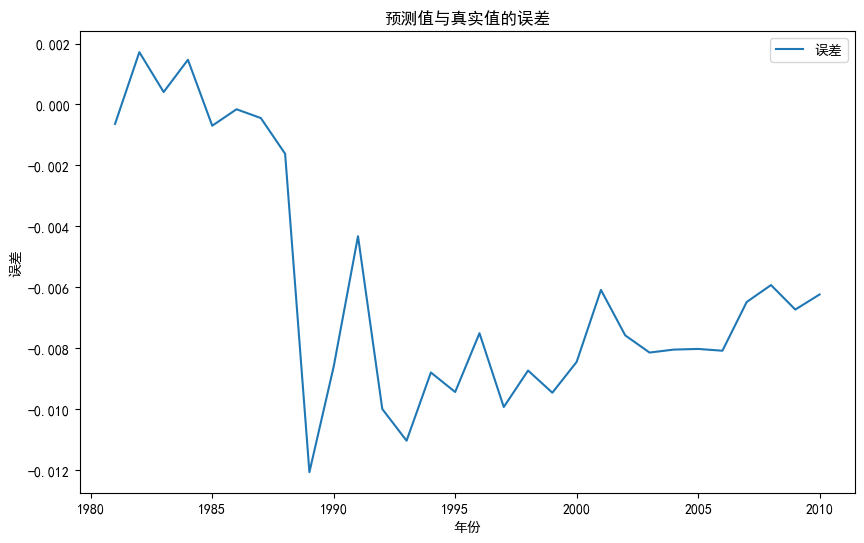

In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, xgbpredictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = xgbpredictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()

# LASSO回归模型

In [14]:
from sklearn.linear_model import Lasso

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
model = Lasso()
model.fit(X_train, y_train)

# 进行预测
lassopredictions = model.predict(X_test)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), lassopredictions):
    print(f"{year}年, 预测比例: {prediction}")


1981年, 预测比例: 1.0966984276218952
1982年, 预测比例: 1.1010096767186734
1983年, 预测比例: 1.1053209258154517
1984年, 预测比例: 1.10963217491223
1985年, 预测比例: 1.1139434240090083
1986年, 预测比例: 1.1182546731057865
1987年, 预测比例: 1.1225659222025648
1988年, 预测比例: 1.126877171299343
1989年, 预测比例: 1.131188420396123
1990年, 预测比例: 1.1354996694929014
1991年, 预测比例: 1.1398109185896796
1992年, 预测比例: 1.144122167686458
1993年, 预测比例: 1.1484334167832362
1994年, 预测比例: 1.1527446658800145
1995年, 预测比例: 1.1570559149767927
1996年, 预测比例: 1.161367164073571
1997年, 预测比例: 1.1656784131703493
1998年, 预测比例: 1.1699896622671275
1999年, 预测比例: 1.1743009113639058
2000年, 预测比例: 1.178612160460684
2001年, 预测比例: 1.1829234095574623
2002年, 预测比例: 1.1872346586542424
2003年, 预测比例: 1.1915459077510206
2004年, 预测比例: 1.195857156847799
2005年, 预测比例: 1.2001684059445772
2006年, 预测比例: 1.2044796550413555
2007年, 预测比例: 1.2087909041381337
2008年, 预测比例: 1.213102153234912
2009年, 预测比例: 1.2174134023316903
2010年, 预测比例: 1.2217246514284685


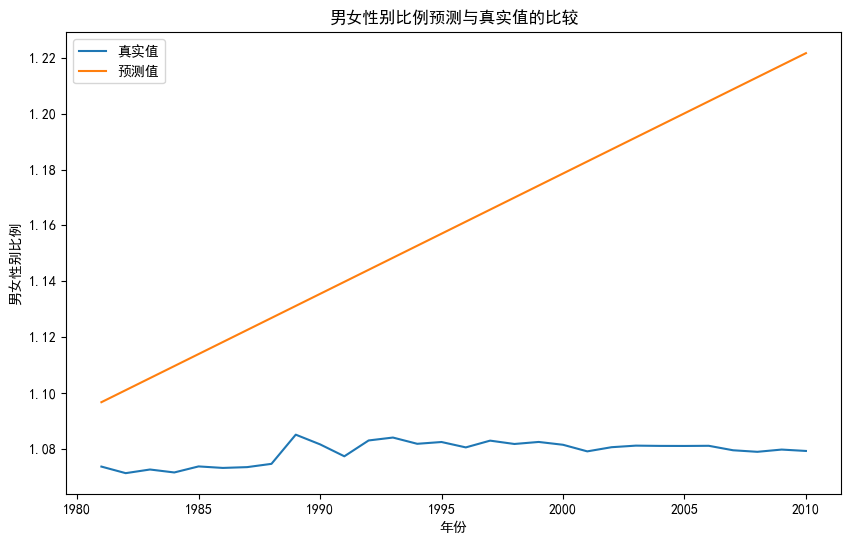

In [15]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, lassopredictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 0.00767177697050488
根均方误差（RMSE）: 0.08758868060717025


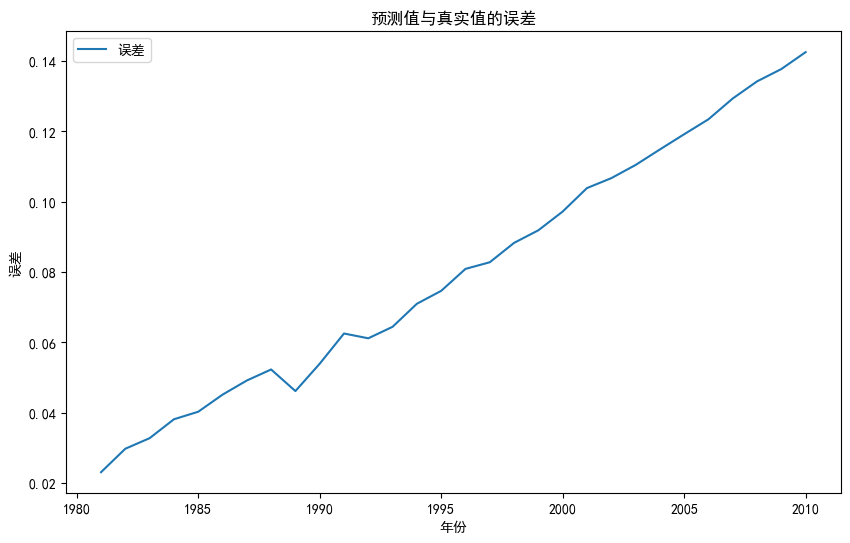

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, lassopredictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = lassopredictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()

# ARIMA模型

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train['ratio']
y_test = test['ratio']
X_test = test.index.values.reshape(-1, 1)

# 将索引转换为日期时间类型
y_train.index = pd.date_range(start='1880', periods=len(y_train), freq='A-DEC')
y_test.index = pd.date_range(start=str(y_train.index[-1].year + 1), periods=len(y_test), freq='A-DEC')

# 创建并训练模型
# 注意：ARIMA 模型的参数需要根据数据进行调整
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

# 进行预测
arimapredictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), arimapredictions):
    print(f"{year}年, 预测比例: {prediction}")

1981年, 预测比例: 1.0750288370908747
1982年, 预测比例: 1.0758029794317874
1983年, 预测比例: 1.0765323914702187
1984年, 预测比例: 1.077219657743733
1985年, 预测比例: 1.0778672134541185
1986年, 预测比例: 1.0784773530960783
1987年, 预测比例: 1.0790522385873498
1988年, 预测比例: 1.079593906929064
1989年, 预测比例: 1.0801042774234848
1990年, 预测比例: 1.0805851584747033
1991年, 预测比例: 1.0810382539963856
1992年, 预测比例: 1.081465169449279
1993年, 预测比例: 1.0818674175298653
1994年, 预测比例: 1.0822464235303246
1995年, 预测比例: 1.0826035303887958
1996年, 预测比例: 1.0829400034478307
1997年, 预测比例: 1.0832570349379034
1998年, 预测比例: 1.0835557482018598
1999年, 预测比例: 1.0838372016752769
2000年, 预测比例: 1.0841023926368338
2001年, 预测比例: 1.0843522607419873
2002年, 预测比例: 1.0845876913524668
2003年, 预测比例: 1.0848095186733915
2004年, 预测比例: 1.085018528709123
2005年, 预测比例: 1.0852154620483274
2006年, 预测比例: 1.0854010164881154
2007年, 预测比例: 1.0855758495065577
2008年, 预测比例: 1.0857405805923381
2009年, 预测比例: 1.085895793439798
2010年, 预测比例: 1.086042038017149


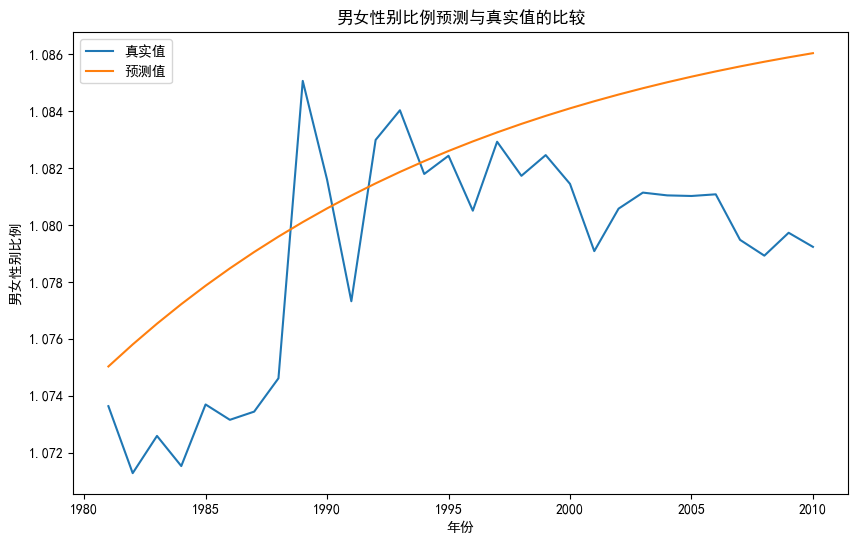

In [32]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, arimapredictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 1.716231379122238e-05
根均方误差（RMSE）: 0.004142742303260291


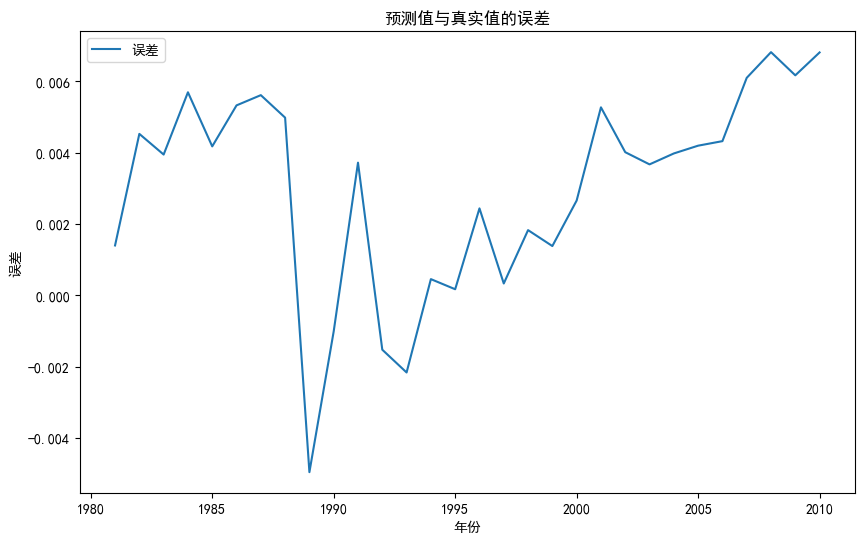

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, arimapredictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = arimapredictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()

# SVR模型

In [20]:
from sklearn.svm import SVR

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
model = SVR()
model.fit(X_train, y_train)

# 进行预测
svrpredictions = model.predict(X_test)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), svrpredictions):
    print(f"{year}年, 预测比例: {prediction}")

1981年, 预测比例: 0.9803735877292576
1982年, 预测比例: 0.9811651527864277
1983年, 预测比例: 0.9819231041191401
1984年, 预测比例: 0.9826437298979306
1985年, 预测比例: 0.9833243844226289
1986年, 预测比例: 0.9839633656642285
1987年, 预测比例: 0.9845597954837365
1988年, 预测比例: 0.9851135043754977
1989年, 预测比例: 0.9856249222029816
1990年, 预测比例: 0.9860949760417405
1991年, 预测比例: 0.9865249959215607
1992年, 预测比例: 0.9869166289706647
1993年, 预测比例: 0.9872717622107803
1994年, 预测比例: 0.9875924540334298
1995年, 预测比例: 0.9878808742043773
1996年, 预测比例: 0.988139252093461
1997年, 预测比例: 0.9883698327090517
1998年, 预测比例: 0.9885748400276391
1999年, 预测比例: 0.9887564470467503
2000年, 预测比例: 0.988916751950534
2001年, 预测比例: 0.989057759758806
2002年, 预测比例: 0.9891813688290456
2003年, 预测比例: 0.9892893615937781
2004年, 预测比例: 0.9893833989401328
2005年, 预测比例: 0.9894650176715095
2006年, 预测比例: 0.9895356305308344
2007年, 预测比例: 0.989596528308734
2008年, 预测比例: 0.9896488836062515
2009年, 预测比例: 0.9896937558689192
2010年, 预测比例: 0.9897320973557904


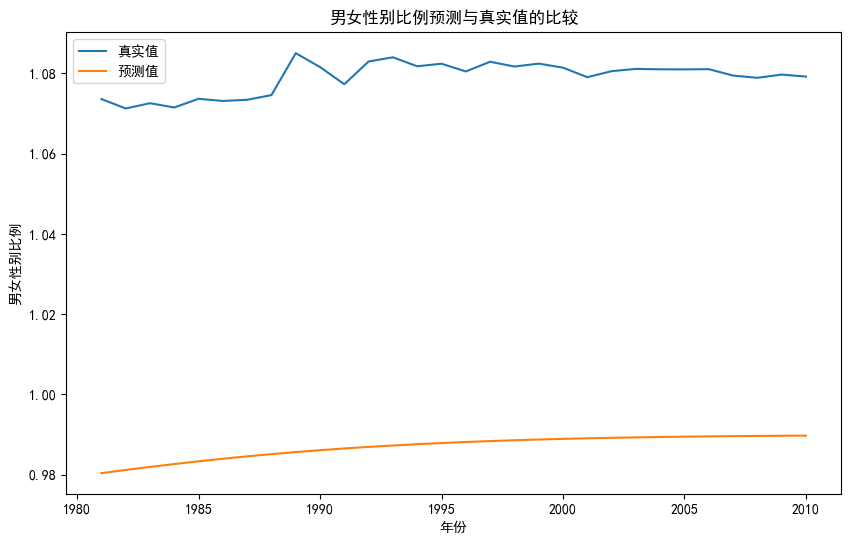

In [21]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, svrpredictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 0.008478318286802766
根均方误差（RMSE）: 0.09207778389385121


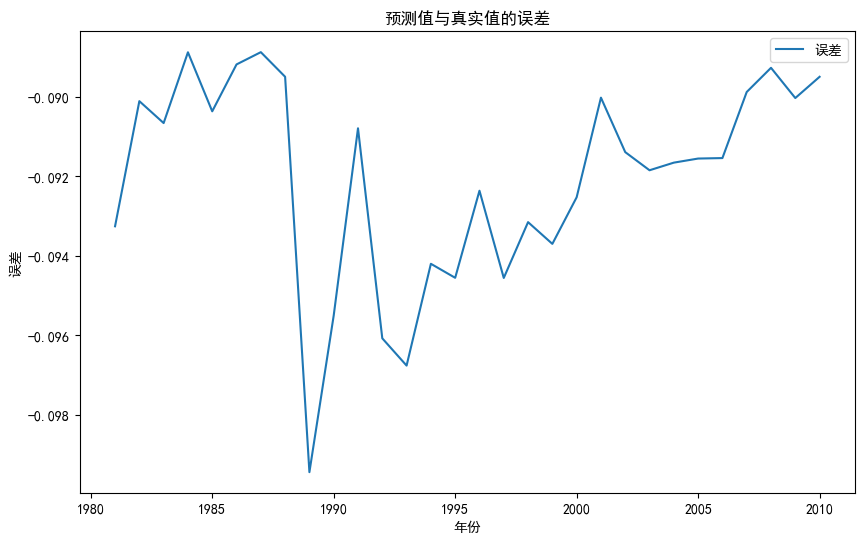

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, svrpredictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = svrpredictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()

# 总结

随机森林算法:
MSE: 4.6029361175577194e-05
RMSE: 0.00678449417241825

回归模型算法1:
MSE: 0.02679069259748423
RMSE: 0.1636786259640648

多项式回归算法:
MSE: 0.04605248335813407
RMSE: 0.21459842347541622

XGBoost回归模型:
MSE: 5.148856595830649e-05
RMSE: 0.007175553355547326

LASSO模型:
MSE: 0.00767177697050488
RMSE: 0.08758868060717025

ARIMA模型:
MSE: 1.716231379122238e-05
RMSE: 0.004142742303260291

SVR模型:
MSE: 0.008478318286802766
RMSE: 0.09207778389385121



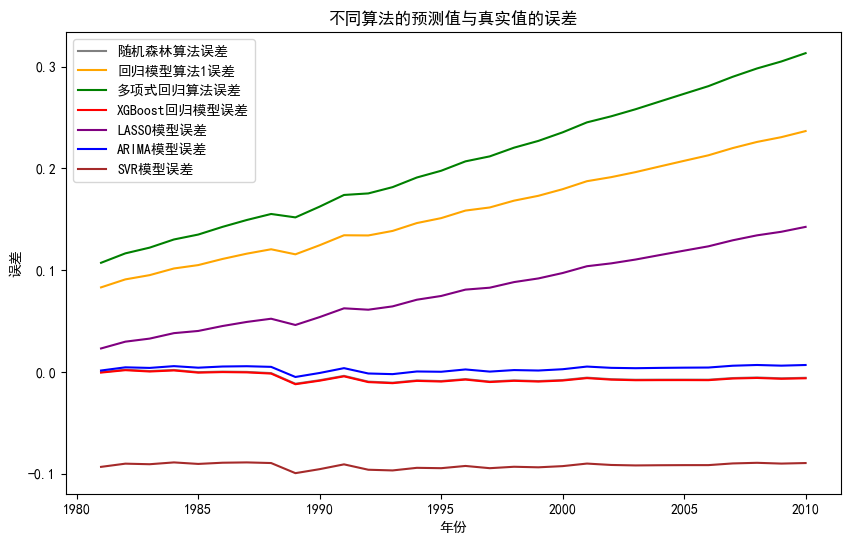

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# 随机森林算法
mse_rf = mean_squared_error(y_test, rfpredictions)
rmse_rf = np.sqrt(mse_rf)
errors_rf = rfpredictions - y_test
print("随机森林算法:")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print()

# 回归模型算法1
mse_lr1 = mean_squared_error(y_test, lr1predictions)
rmse_lr1 = np.sqrt(mse_lr1)
errors_lr1 = lr1predictions - y_test
print("回归模型算法1:")
print(f"MSE: {mse_lr1}")
print(f"RMSE: {rmse_lr1}")
print()

# 多项式回归算法
mse_lr2 = mean_squared_error(y_test, lr2predictions)
rmse_lr2 = np.sqrt(mse_lr2)
errors_lr2 = lr2predictions - y_test
print("多项式回归算法:")
print(f"MSE: {mse_lr2}")
print(f"RMSE: {rmse_lr2}")
print()

# XGBoost回归模型
mse_xgb = mean_squared_error(y_test, xgbpredictions)
rmse_xgb = np.sqrt(mse_xgb)
errors_xgb = xgbpredictions - y_test
print("XGBoost回归模型:")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print()

# LASSO模型
mse_lasso = mean_squared_error(y_test, lassopredictions)
rmse_lasso = np.sqrt(mse_lasso)
errors_lasso = lassopredictions - y_test
print("LASSO模型:")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print()

# ARIMA模型
mse_arima = mean_squared_error(y_test, arimapredictions)
rmse_arima = np.sqrt(mse_arima)
errors_arima = arimapredictions - y_test
print("ARIMA模型:")
print(f"MSE: {mse_arima}")
print(f"RMSE: {rmse_arima}")
print()

# SVR模型
mse_svr = mean_squared_error(y_test, svrpredictions)
rmse_svr = np.sqrt(mse_svr)
errors_svr = svrpredictions - y_test
print("SVR模型:")
print(f"MSE: {mse_svr}")
print(f"RMSE: {rmse_svr}")
print()

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制随机森林算法误差折线图
plt.plot(X_test, errors_rf[:30], label='随机森林算法误差', color='grey')

# 绘制回归模型算法1误差折线图
plt.plot(X_test, errors_lr1[:30], label='回归模型算法1误差', color='orange')

# 绘制多项式回归算法误差折线图
plt.plot(X_test, errors_lr2[:30], label='多项式回归算法误差', color='green')

# 绘制XGBoost回归模型误差折线图
plt.plot(X_test, errors_xgb[:30], label='XGBoost回归模型误差', color='red')

# 绘制LASSO模型误差折线图
plt.plot(X_test, errors_lasso[:30], label='LASSO模型误差', color='purple')

# 绘制ARIMA模型误差折线图
plt.plot(X_test, errors_arima[:30], label='ARIMA模型误差', color='blue')

# 绘制SVR模型误差折线图
plt.plot(X_test, errors_svr[:30], label='SVR模型误差', color='brown')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('不同算法的预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形|
plt.show()

随机森林算法:
MSE: 4.6029361175577194e-05
RMSE: 0.00678449417241825

XGBoost回归模型:
MSE: 5.148856595830649e-05
RMSE: 0.007175553355547326

ARIMA模型:
MSE: 1.716231379122238e-05
RMSE: 0.004142742303260291



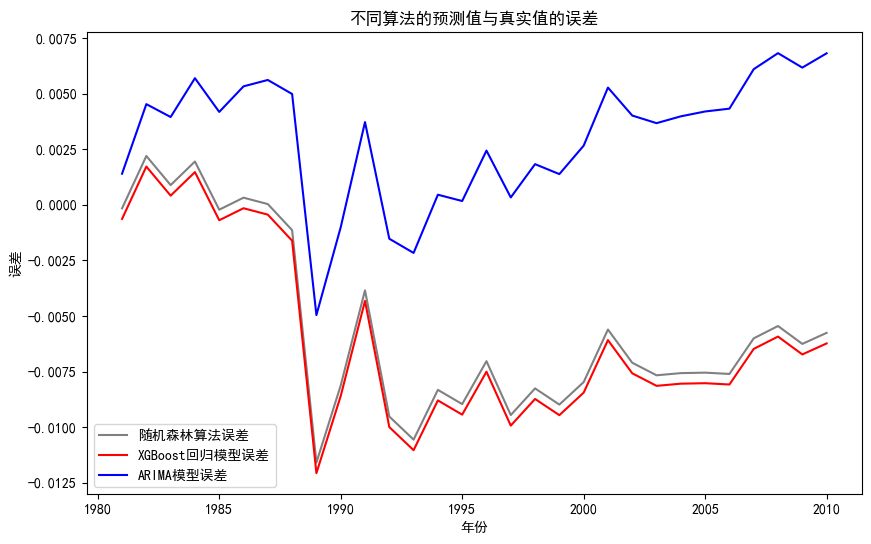

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# 随机森林算法
mse_rf = mean_squared_error(y_test, rfpredictions)
rmse_rf = np.sqrt(mse_rf)
errors_rf = rfpredictions - y_test
print("随机森林算法:")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print()

# XGBoost回归模型
mse_xgb = mean_squared_error(y_test, xgbpredictions)
rmse_xgb = np.sqrt(mse_xgb)
errors_xgb = xgbpredictions - y_test
print("XGBoost回归模型:")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print()

# ARIMA模型
mse_arima = mean_squared_error(y_test, arimapredictions)
rmse_arima = np.sqrt(mse_arima)
errors_arima = arimapredictions - y_test
print("ARIMA模型:")
print(f"MSE: {mse_arima}")
print(f"RMSE: {rmse_arima}")
print()

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制随机森林算法误差折线图
plt.plot(X_test, errors_rf[:30], label='随机森林算法误差', color='grey')

# 绘制XGBoost回归模型误差折线图
plt.plot(X_test, errors_xgb[:30], label='XGBoost回归模型误差', color='red')

# 绘制ARIMA模型误差折线图
plt.plot(X_test, errors_arima[:30], label='ARIMA模型误差', color='blue')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('不同算法的预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形|
plt.show()

In [36]:
# 定义一个字典，存储每个算法的MSE和RMSE
algorithm_errors = {
    '随机森林算法': {'MSE': mse_rf, 'RMSE': rmse_rf},
    '回归模型算法1': {'MSE': mse_lr1, 'RMSE': rmse_lr1},
    '多项式回归算法': {'MSE': mse_lr2, 'RMSE': rmse_lr2},
    'XGBoost回归模型': {'MSE': mse_xgb, 'RMSE': rmse_xgb},
    'LASSO模型': {'MSE': mse_lasso, 'RMSE': rmse_lasso},
    'ARIMA模型': {'MSE': mse_arima, 'RMSE': rmse_arima},
    'SVR模型': {'MSE': mse_svr, 'RMSE': rmse_svr},
}

# 按MSE升序排列算法
sorted_algorithms_mse = sorted(algorithm_errors.items(), key=lambda x: x[1]['MSE'])

# 输出MSE最低的三个算法
print("MSE最低的三个算法:")
for i in range(3):
    algorithm_name, errors = sorted_algorithms_mse[i]
    print(f"{algorithm_name}: {errors['MSE']}")

# 按RMSE升序排列算法
sorted_algorithms_rmse = sorted(algorithm_errors.items(), key=lambda x: x[1]['RMSE'])

# 输出RMSE最低的三个算法
print("\nRMSE最低的三个算法:")
for i in range(3):
    algorithm_name, errors = sorted_algorithms_rmse[i]
    print(f"{algorithm_name}: {errors['RMSE']}")

print("\n由此可以得出：")
for i in range(3):
    algorithm_name, errors = sorted_algorithms_rmse[i]
    print(f"{algorithm_name}")
print("这三个算法的误差率最低，是更为精确的")

MSE最低的三个算法:
ARIMA模型: 1.716231379122238e-05
随机森林算法: 4.6029361175577194e-05
XGBoost回归模型: 5.148856595830649e-05

RMSE最低的三个算法:
ARIMA模型: 0.004142742303260291
随机森林算法: 0.00678449417241825
XGBoost回归模型: 0.007175553355547326

由此可以得出：
ARIMA模型
随机森林算法
XGBoost回归模型
这三个算法的误差率最低，是更为精确的
